In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
df.shape

(1599, 12)

## Spliting the data into training and testing data

In [4]:
train_df = df.loc[df.index < 1199]
test_df = df.loc[df.index >= 1199]

In [5]:
train_df.shape

(1199, 12)

In [6]:
test_df.shape

(400, 12)

In [7]:
input_cols = list(df.columns[:11])
target_cols = 'quality'

In [8]:
input_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [9]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

## Random Forrest Classfier

In [10]:
rfc = RandomForestClassifier(n_jobs= 1 , n_estimators= 200 ,random_state= 42)
rfc.fit(train_inputs, train_targets)

RandomForestClassifier(n_estimators=200, n_jobs=1, random_state=42)

In [11]:
preds = rfc.predict(test_inputs)

In [12]:
rfc.score(test_inputs, test_targets)

0.6125

In [13]:
importance = pd.DataFrame({"feature" : input_cols ,
                          "importance" : rfc.feature_importances_})
importance

,feature,importance
0,fixed acidity,0.075524
1,volatile acidity,0.097352
2,citric acid,0.076005
3,residual sugar,0.074362
4,chlorides,0.078733
5,free sulfur dioxide,0.064760
6,total sulfur dioxide,0.107721
7,density,0.091181
8,pH,0.076435
9,sulphates,0.106348


<AxesSubplot: xlabel='importance', ylabel='feature'>

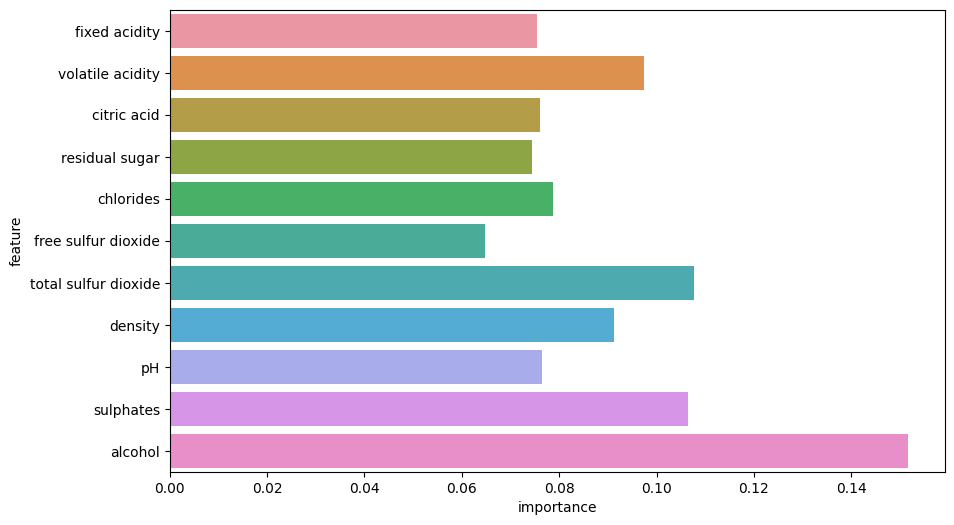

In [14]:
fig = plt.figure(figsize= (10,6))
sns.barplot(x = 'importance' , y = 'feature' , data = importance)

# Trainning KNN Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=51)

In [25]:
knn.fit(train_inputs, train_targets)

KNeighborsClassifier(n_neighbors=51)

In [26]:
knn.score(test_inputs, test_targets)

0.4925

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(solver = 'liblinear' , n_jobs = 50)

In [29]:
lr.fit(train_inputs, train_targets)

C:\Users\DEll\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 50.
  warnings.warn(


LogisticRegression(n_jobs=50, solver='liblinear')

In [30]:
train_preds = lr.predict(test_inputs)

In [31]:
train_preds

array([5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6,
       5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6,
       6, 6, 6, 5, 7, 6, 6, 6, 5, 6, 5, 7, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 7, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 5, 5, 6, 6, 5, 6, 7, 6, 6, 6, 6, 6, 7, 5, 6, 5, 6, 6, 5,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6,
       5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 7, 5, 7, 5, 6, 5, 6, 5, 6, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(test_targets, train_preds)

0.6175